In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import re
import string
import tensorflow as tf
from tensorflow import keras
from transformers import pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [2]:
# Load the exported data
df1 = pd.read_csv(r"C:\Users\user\Desktop\Faculty Feedback\data\exported_sentiments.csv")

# Encode the target labels (0 for negative, 1 for positive)
df1['Sentiments'] = df1['Sentiments'].replace({
    'negative': 0,
    'positive': 1
})

In [3]:
df1.head()

,Course Code,Feedback,Previous Experience,Gender,Attendance,Course Difficulty,Study Hours (per week),Overall Satisfaction,Department,Date,Time,Hour,Processed_Feedback,Char_Count,Word_Count,Sentiment_Scores,Sentiments
0,CPE 321,"The man is too fast in his teaching,he clearly...",No,Male,Regular,Challenging,21,5,Yes,2023-05-21,03:29:49,3,man fast teachinghe clearly doesnt know teach ...,58,9,0.150000,1
1,CPE 331,The class is dry but he really puts in efforts,Yes,Male,Regular,Moderate,7,8,Yes,2023-05-21,03:39:59,3,class dry really put effort,27,5,0.066667,1
2,CPE 321,The course is shit and it's a threat to my bra...,No,Male,Regular,Challenging,7,4,Yes,2023-05-21,03:57:54,3,course shit threat brainthe teaching mode poor,46,7,-0.300000,0
3,CPE 321,"He no try at all, didn’t teach well.",No,Male,Regular,Challenging,12,1,Yes,2023-05-21,04:52:08,4,try didnt teach well,20,4,0.000000,0
4,CPE 321,Ogbeni you sef know as e dae go,Yes,Male,Occasional,Difficult,0,0,Yes,2023-05-21,05:24:33,5,ogbeni sef know e dae go,24,6,0.000000,0


In [4]:
# Separate the features and the target labels
X = df1['Feedback']
y = df1['Sentiments']

# Display the target labels to ensure correctness
print(y.value_counts())

Sentiments
0    59
1    41
0     1
Name: count, dtype: int64


In [5]:
# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)  # Remove URLs, mentions, and hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r'\b[0-9]+\b\s*', '', text)  # Remove numbers
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation again
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Get the set of stopwords
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()  # Initialize the lemmatizer
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize tokens
    return ' '.join(tokens)  # Join tokens back into a single string

In [6]:
# Define the helper function with formatted output
def display_label_score(texts, predictions):
    for text, prediction in zip(texts, predictions):
        label = prediction['label']
        score = prediction['score']
        print(f"Text: \"{text}\"")
        print(f"  - Label: {label}")
        print(f"  - Score: {score:.4f}")
        print("-" * 40)

In [7]:
# Load the pretrained BERT model for sentiment analysis using the pipeline
classifier = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")

In [8]:
# Check the model's performance on new samples
sentiment_categories = ["negative", "positive"]
new_examples = list(df1['Feedback'].sample(10))

# Predict the sentiment of new examples
results = classifier([preprocess_text(example) for example in new_examples])
display_label_score(new_examples, results)

Text: "the way the course is taught is not up to 21st century standard"
  - Label: NEU
  - Score: 0.9232
----------------------------------------
Text: "I hate coding"
  - Label: NEG
  - Score: 0.9642
----------------------------------------
Text: "nice"
  - Label: POS
  - Score: 0.6860
----------------------------------------
Text: "That man no good at all"
  - Label: POS
  - Score: 0.9428
----------------------------------------
Text: "This lecturer really tried for us to be honest but with the teaching of hundreds of students at a time, the class is very rowdy and students are mostly left to study on their own."
  - Label: NEG
  - Score: 0.6180
----------------------------------------
Text: "course should  not be difficult but lecturer messed it up"
  - Label: NEG
  - Score: 0.9743
----------------------------------------
Text: "this practical is hard on top 1 unit course haba"
  - Label: NEU
  - Score: 0.8429
----------------------------------------
Text: "The course is actually we

## Saving models

In [9]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Define model and tokenizer
model_name = "finiteautomata/bertweet-base-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)

# Save the tokenizer and model
save_directory = "./saved_model"
tokenizer.save_pretrained(save_directory)
model.save_pretrained(save_directory)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [10]:
# Define a custom path using a raw string
save_directory = r"C:\Users\user\Desktop\Faculty Feedback\Sentiment-Analysis-with-Student-Feedback\saved-model"

# Save the tokenizer and model
tokenizer.save_pretrained(save_directory)
model.save_pretrained(save_directory)

## Download saved models

In [11]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, pipeline

# Load the tokenizer and model
restored_tokenizer = AutoTokenizer.from_pretrained(save_directory)
restored_model = TFAutoModelForSequenceClassification.from_pretrained(save_directory)

# Create the pipeline using the restored model and tokenizer
restored_classifier = pipeline("sentiment-analysis", model=restored_model, tokenizer=restored_tokenizer)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at C:\Users\user\Desktop\Faculty Feedback\Sentiment-Analysis-with-Student-Feedback\saved-model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


## Predicting new examples

In [12]:
# Define the helper function with formatted output
def display_label_score(texts, predictions):
    for text, prediction in zip(texts, predictions):
        label = prediction['label']
        score = prediction['score']
        print(f"Text: \"{text}\"")
        print(f"  - Label: {label}")
        print(f"  - Score: {score:.4f}")
        print("-" * 40)

In [13]:
# Define example texts
positive_examples = [
    "I love this! It's absolutely wonderful.",
    "This is the best day ever.",
    "I'm so happy with the results.",
    "Fantastic job! I'm very impressed.",
    "This product exceeded my expectations."
]

negative_examples = [
    "I hate this. It's terrible.",
    "I'm very disappointed with the service.",
    "This is the worst experience ever.",
    "I regret buying this. It's awful.",
    "The quality is just subpar and unacceptable."
]

In [14]:
# Predict sentiments for negative examples
print("\nNegative Examples Predictions:")
negative_predictions = restored_classifier(negative_examples)
display_label_score(negative_examples, negative_predictions)


Negative Examples Predictions:
Text: "I hate this. It's terrible."
  - Label: NEG
  - Score: 0.9830
----------------------------------------
Text: "I'm very disappointed with the service."
  - Label: NEG
  - Score: 0.9845
----------------------------------------
Text: "This is the worst experience ever."
  - Label: NEG
  - Score: 0.9823
----------------------------------------
Text: "I regret buying this. It's awful."
  - Label: NEG
  - Score: 0.9843
----------------------------------------
Text: "The quality is just subpar and unacceptable."
  - Label: NEG
  - Score: 0.9824
----------------------------------------


In [15]:
# Predict sentiments for positive examples
print("Positive Examples Predictions:")
positive_predictions = restored_classifier(positive_examples)
display_label_score(positive_examples, positive_predictions)

Positive Examples Predictions:
Text: "I love this! It's absolutely wonderful."
  - Label: POS
  - Score: 0.9924
----------------------------------------
Text: "This is the best day ever."
  - Label: POS
  - Score: 0.9921
----------------------------------------
Text: "I'm so happy with the results."
  - Label: POS
  - Score: 0.9922
----------------------------------------
Text: "Fantastic job! I'm very impressed."
  - Label: POS
  - Score: 0.9922
----------------------------------------
Text: "This product exceeded my expectations."
  - Label: POS
  - Score: 0.9391
----------------------------------------


## Metrics of Model

In [16]:
# Separate the features and the target labels
X = df1['Feedback']
y = df1['Sentiments']

In [17]:
# Encode the target labels (negative for 0, positive for 1 )
df1['Sentiments'] = df1['Sentiments'].replace({
    0: 'negative',
    1: 'positive'
})

In [18]:
df1['Sentiments']= df1['Sentiments'].astype(str)
df1['Sentiments'].dtype

dtype('O')

In [19]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Assuming df1 is your DataFrame and classifier is your trained model
# Convert the 'Sentiments' column to a list of strings
y_true = df1['Sentiments'].tolist()

# Predict the sentiments
sentiments_list = df1['Sentiments'].tolist()
y_pred = classifier(sentiments_list)  # Ensure classifier outputs a list of predictions

# If y_pred is not a list of strings, convert it appropriately
if isinstance(y_pred, pd.DataFrame):
    y_pred = y_pred.iloc[:, 0].tolist()
elif isinstance(y_pred, pd.Series):
    y_pred = y_pred.tolist()

In [21]:
# Ensure y_pred is a list of strings
y_pred = [str(pred) for pred in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_true, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print all the metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


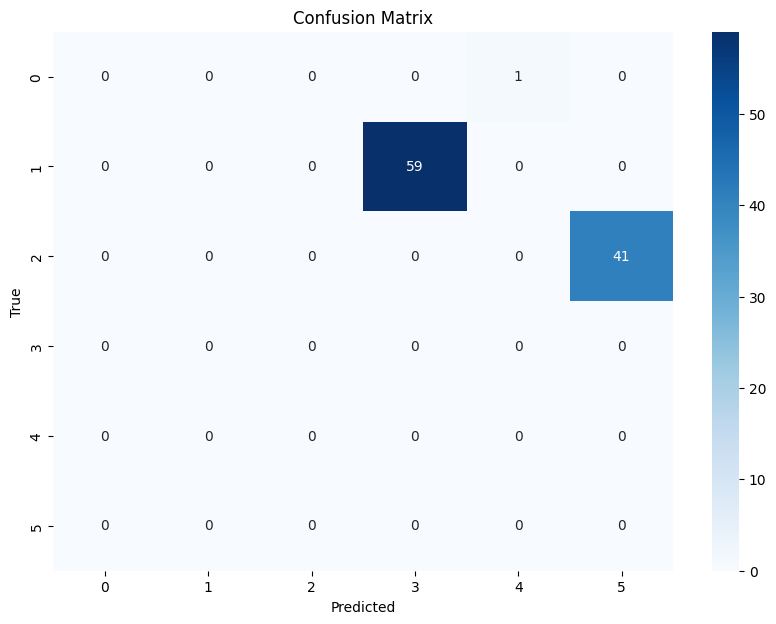

In [22]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()